1. Berapa banyak sepedah yang dipinjam ketika workingday?
2. Hari apa saja jika hari aktivitas yang ramai dipakai?
2. Dan bulan berapa yang paling banyak dipinjamkan dalam tahun 2011 s.d 2012?

In [501]:
import pandas as pd # Library untuk operasi data
import numpy as np # Library untuk operasi matematika
import matplotlib.pyplot as plt # Library untuk visualisasi data/plotting
import seaborn as sns # Library untuk visualisasi data/plotting korelasi

# Data Wrangling

### Gathering data


 Dataset ```Bike Sharing``` yang merupakan dataset yang diambil dari Kaggle oleh Dicoding.
 Dataset ini berisi informasi jumlah sepeda sewaan per jam dan per hari antara tahun 2011 dan 2012 di sistem berbagi sepeda Capital dengan informasi cuaca dan musim yang sesuai.

 Informasi tersebut dibagi menjadi jadi 2 csv yaitu sepeda sewaan perjam(hour.csv) dan sewaan per hari(day.csv)


In [502]:
"""
DO: Membaca file dataset dari folder data dan menampilkan 5 data pertama dari file day.csv

"""

data_day = pd.read_csv('data/day.csv')
data_day.head() # Menampilkan 5 data pertama

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [503]:
data_day.tail() # DO: Menampilkan 5 data terakhir

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [504]:
"""

DO: Membaca file dataset dari folder data dan menampilkan 5 data pertama dari file hour.csv

"""

data_hour = pd.read_csv('data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [505]:
data_hour.tail() # DO: Menampilkan 5 data terakhir

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Pada data day.csv terdapat 731 row dan 16 fitur

In [506]:
data_day.shape


(731, 16)

Pada data hour.csv terdapat 17379 row dan 17 fitur

In [507]:
data_hour.shape

(17379, 17)

### Assesing data
Informasi dari kolom yang kita dapatkan dari csv:

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Mari konversi data agar mudah dipahami ketika membaca data tersebut, ada beberapa kolom yang akan di konversi seperti ```season```, ```year```, ```weathersit```, ```month```

Rencana yang akan dikonversi pada kolom tersebut sebagai berikut:

Before:

1. ```season```: 1 s.d 4
2. ```year```: 0(2011) s.d 1(2012)
3. ```weathersit```: 1 s.d 4
4. ```month```: 1.sd 12
5. ```dteday```: Type data string

After:

1. ```season```: springer s.d winter
2. ```year```: 2011 / 2012
3. ```weathersit```: clear, misty,Light rain, Heavy Rain
4. ```month```: January s.d December
5. ```dteday```: Type data datetime

In [508]:
# Mengecek tipe data dari kolom dteday apakah bertipe object(string) atau datetime
dtDay = data_day['dteday'].dtype == 'object'
dtDay


True

Ternyata dteday tipedatanya datetime mari kita konversi ke datetime

In [509]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

is_dteday_datetime = data_day['dteday'].dtype == 'datetime64[ns]'
is_dteday_datetime


True

In [510]:
"""
Melakukan konversi terhadap 4 fitur season, year, month, dan weathersit pada dataset day.csv dan hour.csv

"""

data_day['season'] = data_day['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data_hour['season'] = data_hour['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

data_day['yr'] = data_day['yr'].replace({0: 2011, 1: 2012})
data_hour['yr'] = data_hour['yr'].replace({0: 2011, 1: 2012})

data_day['month'] = data_day['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
data_hour['month'] = data_hour['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data_day['weathersit'] = data_day['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
data_hour['weathersit'] = data_hour['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

data_day['weekday'] = data_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
data_hour['weekday'] = data_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})


In [511]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2011-01-01,Springer,2011,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,January
1,2,2011-01-02,Springer,2011,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,January
2,3,2011-01-03,Springer,2011,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January
3,4,2011-01-04,Springer,2011,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January
4,5,2011-01-05,Springer,2011,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January


In [512]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2011-01-01,Springer,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,January
1,2,2011-01-01,Springer,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,January
2,3,2011-01-01,Springer,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,January
3,4,2011-01-01,Springer,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,January
4,5,2011-01-01,Springer,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,January


### Check Missing Value & Duplicate value

Memeriksa dari kedua dataset(data.csv dan hour.csv) untuk melihat apakah ada row/data yang hilang(missing value) dari setiap fitur(columns) dan valuenya duplikat?

In [513]:
# DO: Cek apakah ada data yang kosong pada dataset day.csv
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
month         0
dtype: int64

In [514]:
# DO: Cek apakah ada data yang kosong pada dataset hour.csv
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
month         0
dtype: int64

Terlihat tidak ada data yang duplikasi dari kedua data hour maupun day

In [515]:
# DO : Cek duplikasi data pada dataset day.csv
data_day.duplicated().sum()

0

In [516]:
# DO : Cek duplikasi data pada dataset hour.csv
data_hour.duplicated().sum()

0

Mengecek yr(year) apakah sesuai dengan dteday?

In [517]:
# DO: Mengecek yr(year) apakah sesuai dengan dteday?
for i in range(data_day.shape[0]):
    if data_day['yr'].iloc[i] != data_day['dteday'].iloc[i].year:
        print('Ada kesalahan pada baris ke-', i)
        break
print('Semua data yr(year) sesuai dengan dteday')

Semua data yr(year) sesuai dengan dteday


In [518]:
# DO: Mengecek yr(year) apakah sesuai dengan dteday?
for i in range(data_hour.shape[0]):
    if data_hour['yr'].iloc[i] != data_hour['dteday'].iloc[i].year:
        print('Ada kesalahan pada baris ke-', i)
        break
print('Semua data yr(year) sesuai dengan dteday')

Semua data yr(year) sesuai dengan dteday


Sudah sesuai dteday yang dipinjam dengan tahun tersebut kita akan merger terhadap data day dan data hour

### Check Outliers

Pada beberapa fitur terlihat ada beberapa outlier pada fitur tersebut.

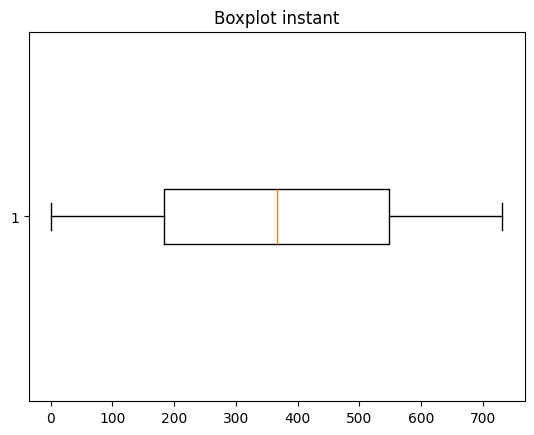

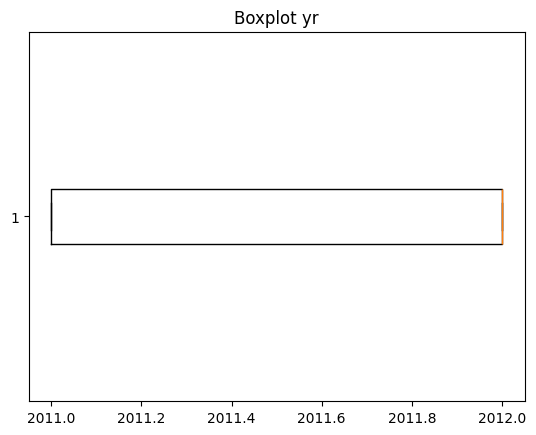

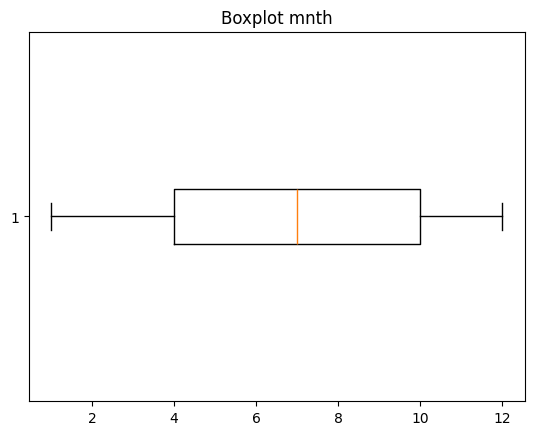

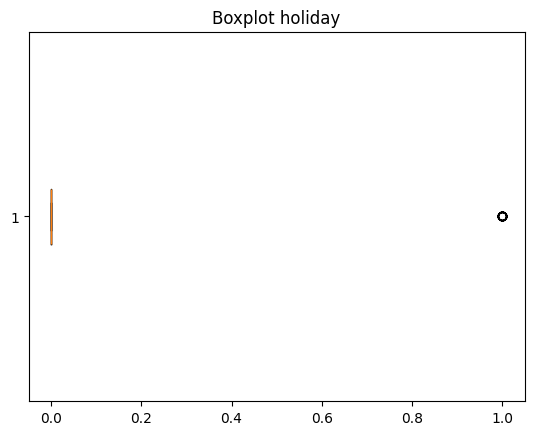

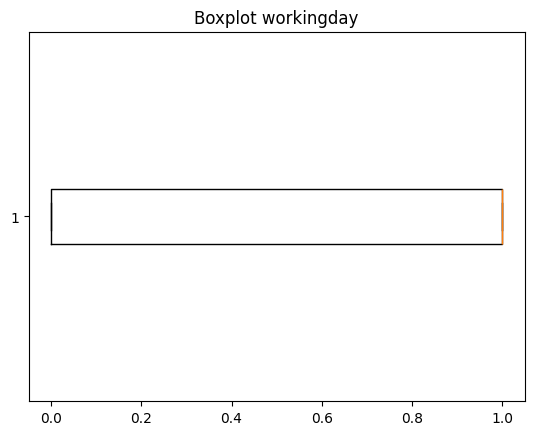

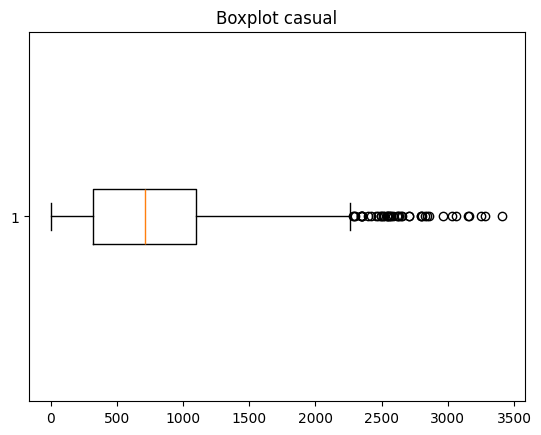

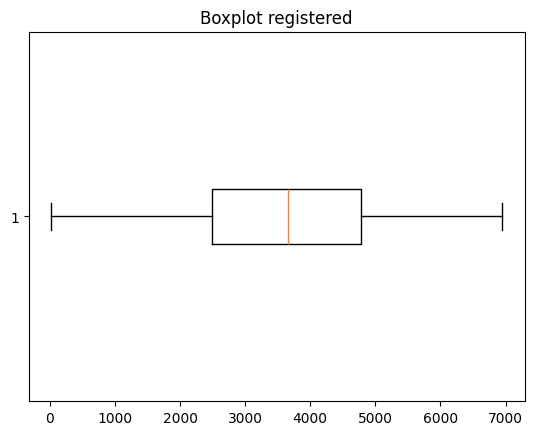

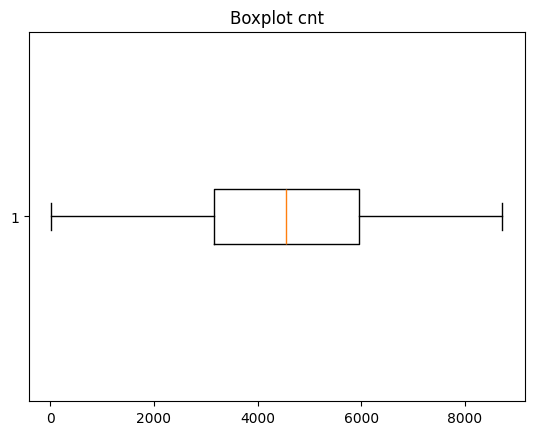

In [519]:
#DO: Cek outlier dari semua fitur dari data_day
for col in data_day.select_dtypes(include=['int64']).columns:
    plt.boxplot(data_day[col], vert=False)
    plt.title(f'Boxplot {col}')
    plt.show()

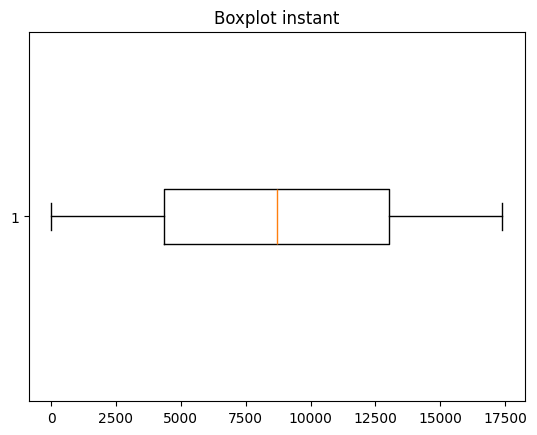

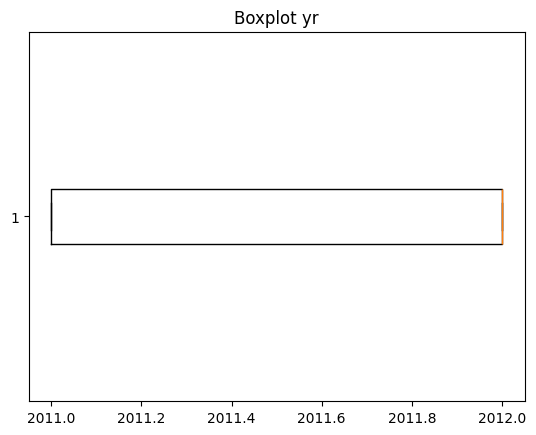

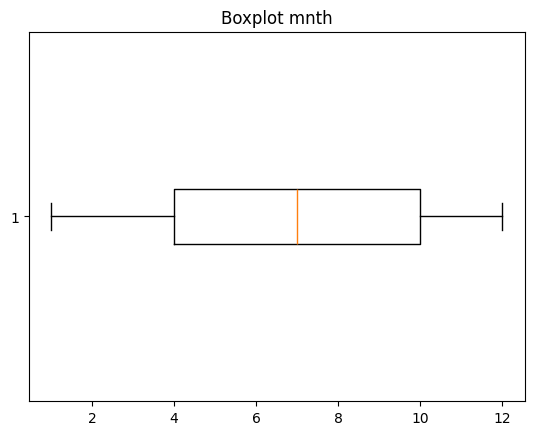

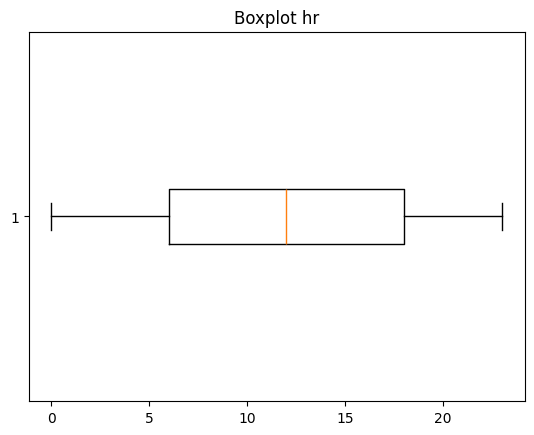

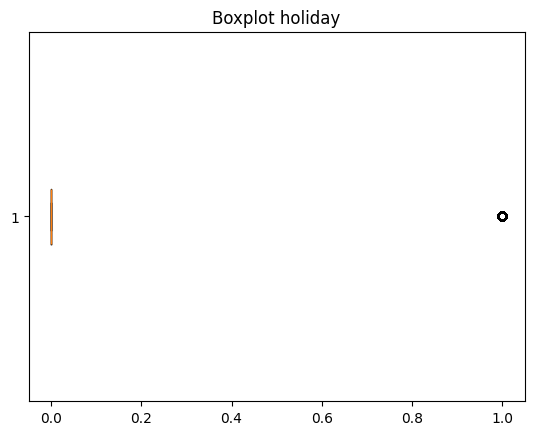

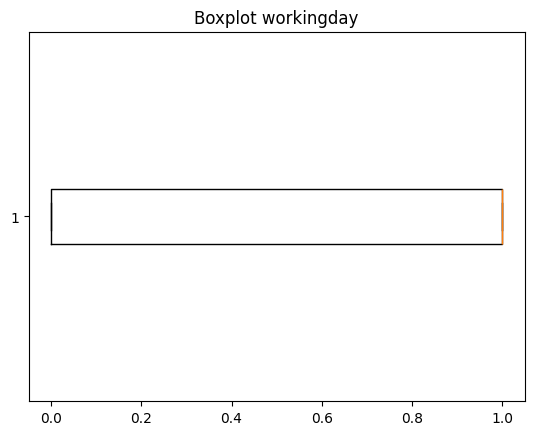

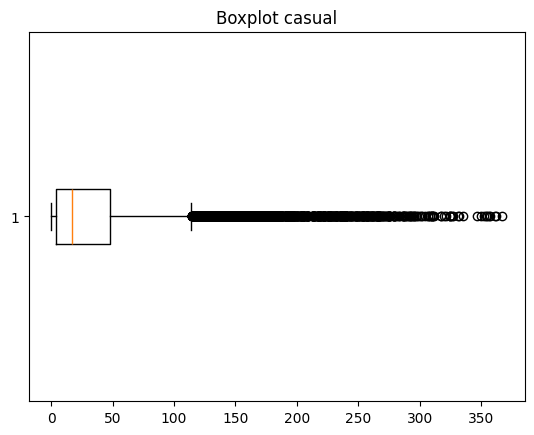

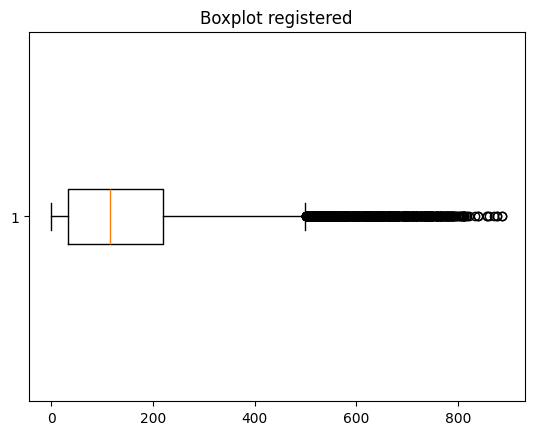

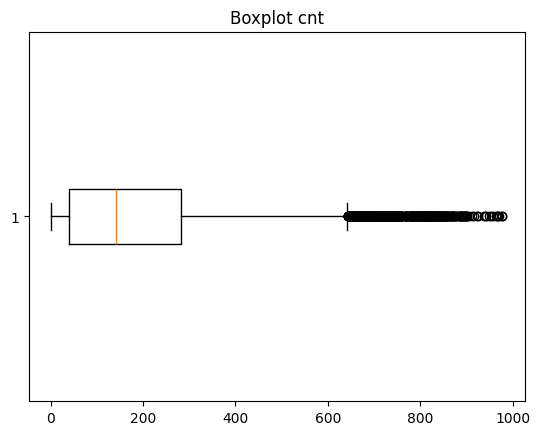

In [520]:
#DO: Cek outlier dari semua fitur dari data_hour
for col in data_hour.select_dtypes(include=['int64']).columns:
    plt.boxplot(data_hour[col], vert=False)
    plt.title(f'Boxplot {col}')
    plt.show()

Terlihat beberapa fitur memmpunyai outlier

### Exploratory Data Analysis (EDA)

Melihat korlelasi dari setiap data: data_day, data_hour dan hasil merger

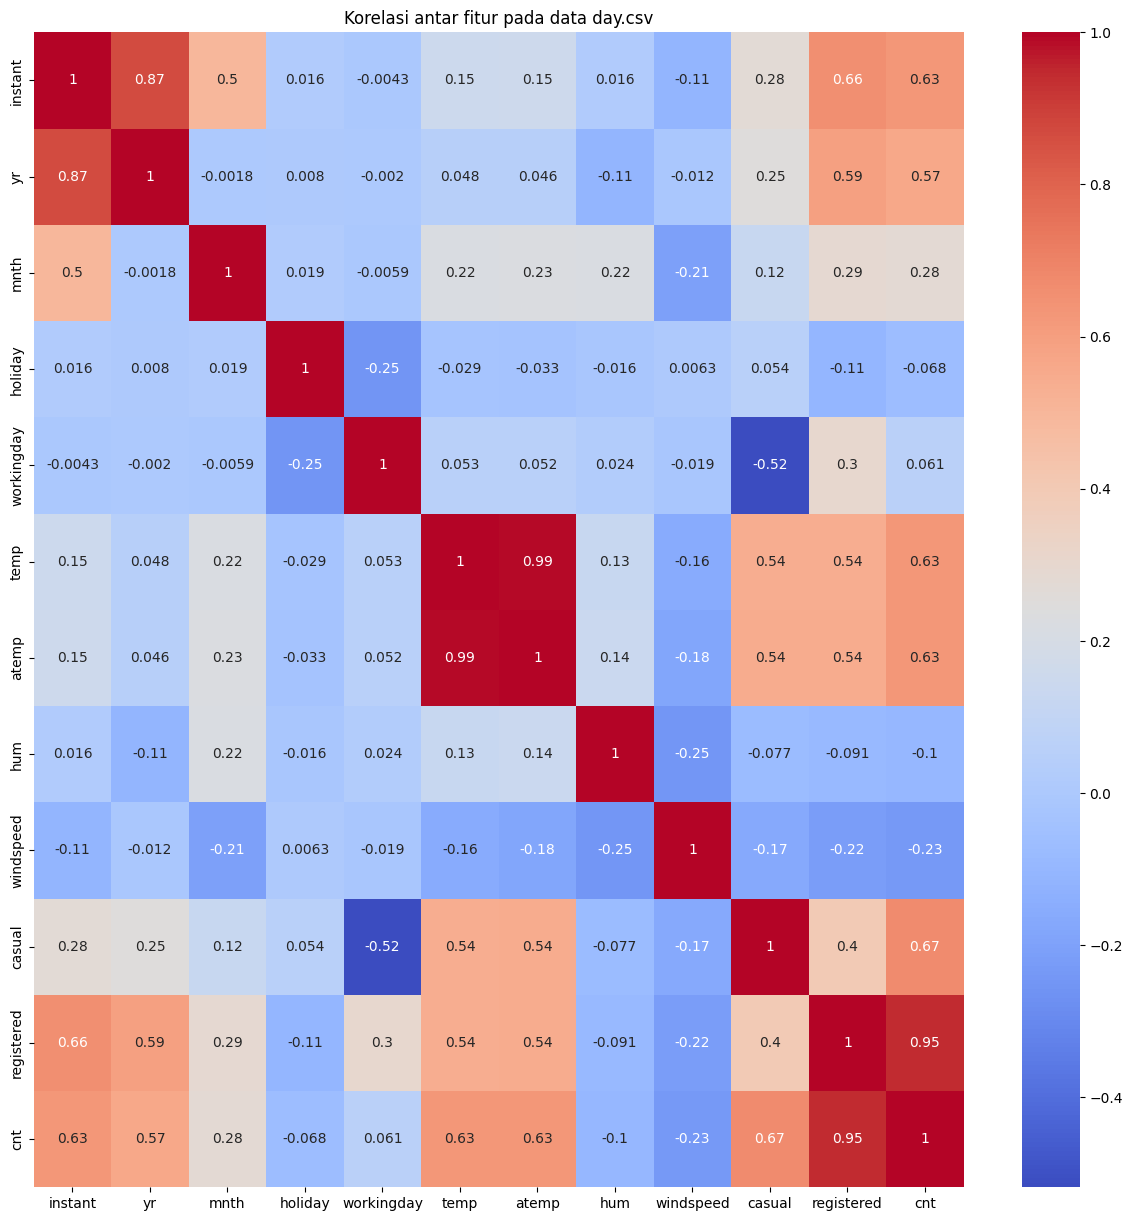

In [521]:
# DO: Cek korelasi antar fitur menggunakan heatmap dari data day.csv
plt.figure(figsize=(15, 15))
sns.heatmap(data_day.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur pada data day.csv')
plt.show()

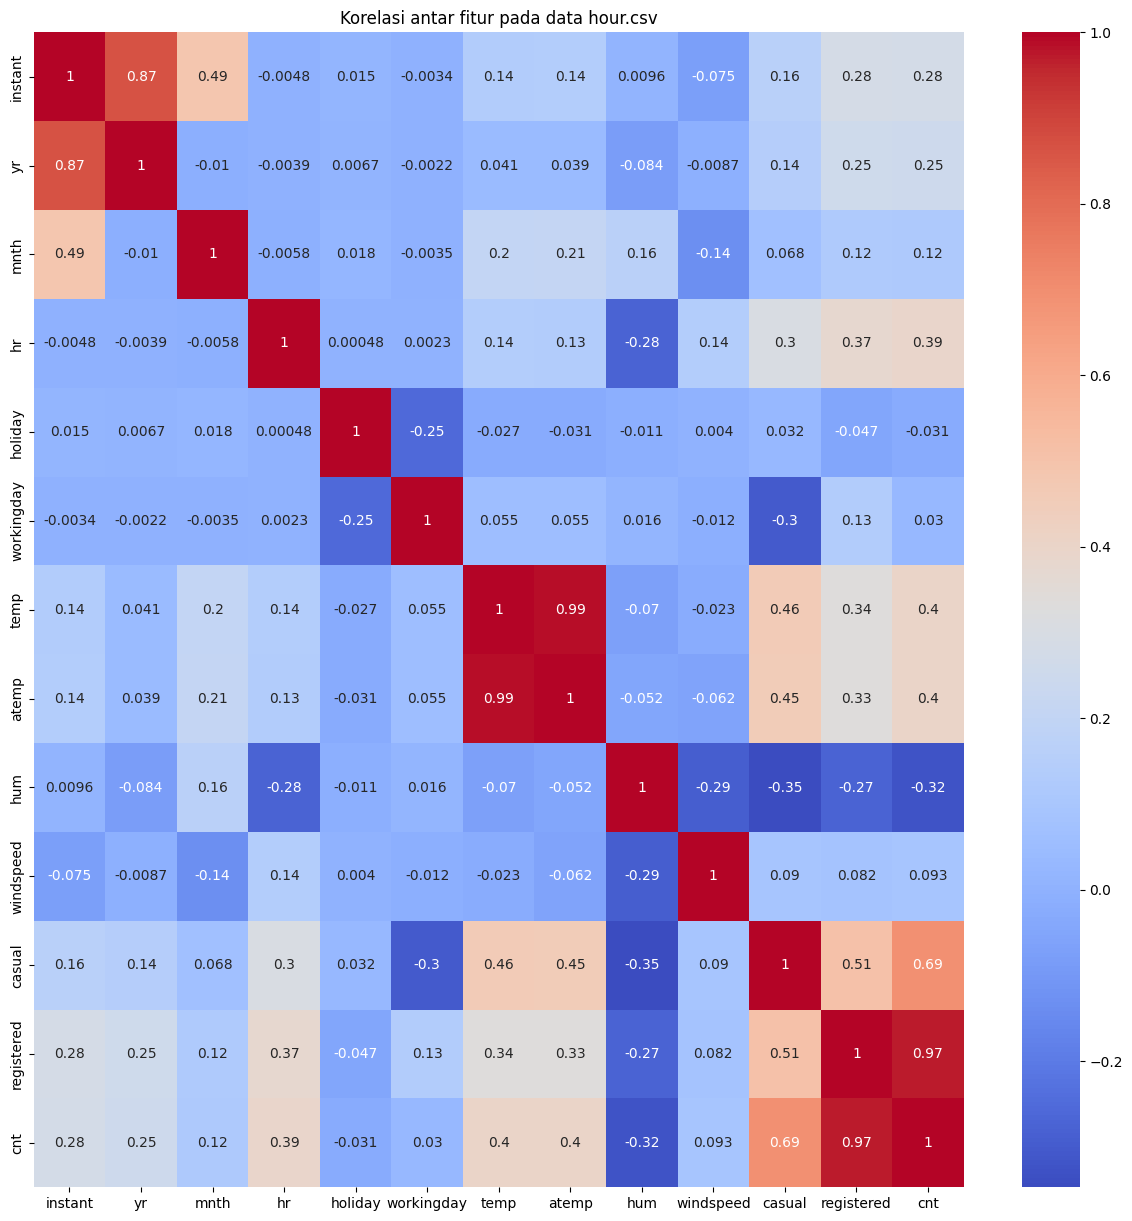

In [522]:
# DO: Cek korelasi antar fitur menggunakan heatmap dari data hour.csv
plt.figure(figsize=(15, 15))
sns.heatmap(data_hour.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur pada data hour.csv')
plt.show()

Heatmap korelasi yang kita miliki dari day dan hour terlihat pada cnt berkorelasi dengan 

In [523]:
# Buatkan barplot vertical untuk menghitung penyewaan sepeda berdasarkan weekday_day dan weekday_hour
workingday_counts = data_day.groupby('workingday')['cnt'].sum()
workingday_counts

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

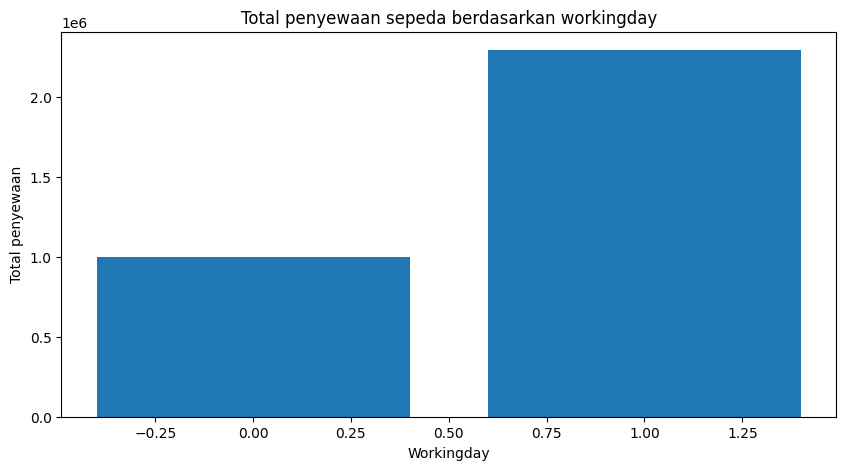

In [525]:
# Buatkan barplot vertical untuk menghitung penyewaan sepeda berdasarkan weekday_day dan weekday_hour
# workingday_counts = data_day.groupby('workingday')['cnt'].sum()
# workingday_counts

# buatkan plot 
plt.figure(figsize=(10, 5))
plt.bar(workingday_counts.index, workingday_counts.values)
plt.title('Total penyewaan sepeda berdasarkan workingday')
plt.xlabel('Workingday')
plt.ylabel('Total penyewaan')
plt.show()
